# Oscar Data Set

## Tasks:
- Cleaning
- Analysis
- winner classifications (with classifiers such as Logistic Regression, SVM, etc and CNN)

## Goal:
- Generate information from the dataset
- build a prediction model

In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
import squarify
import matplotlib.pyplot as plt

In [2]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [3]:
file_path = "/Users/Any/Desktop/Hapag Llyod/database.csv"
df_initial = pd.read_csv(file_path)

array([[<AxesSubplot:title={'center':'Ceremony'}>,
        <AxesSubplot:title={'center':'Winner'}>]], dtype=object)

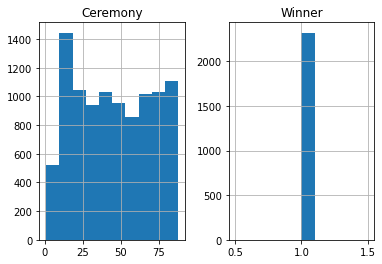

In [4]:
%matplotlib inline
df_initial.hist()

In [5]:
df_initial.profile_report(title = "OSCAR Statistical Report")

## Data Cleaning

In [6]:
# Make a copy of the dataframe
df = df_initial.copy()

### Handling missing values for "Winner" variable 

In [7]:
# Winnner present 7643 rows of missing values (representing 76.7% of 9964 rows)
# control missing rows by substituing the missing values by 0, assuming that if win is 1 then the other case might be loss.

In [8]:
df['Winner'] = df['Winner'].fillna(0)
df['Winner'] = df['Winner'].astype(int)

In [9]:
# create a column where year is not composed of two years, just the year of the ceremony

In [10]:
df["Year_ceremony"] = df.Year.apply(lambda x: int(x) if '/' not in x else int(x.split("/")[1]))
#df = df[df.Year_ceremony >= 1935]

In [11]:
df['Award'].unique()

array(['Actor', 'Actress', 'Art Direction', 'Cinematography',
       'Directing (Comedy Picture)', 'Directing (Dramatic Picture)',
       'Engineering Effects', 'Outstanding Picture',
       'Unique and Artistic Picture', 'Writing (Adaptation)',
       'Writing (Original Story)', 'Writing (Title Writing)',
       'Special Award', 'Directing', 'Writing', 'Outstanding Production',
       'Sound Recording', 'Short Subject (Cartoon)',
       'Short Subject (Comedy)', 'Short Subject (Novelty)',
       'Assistant Director', 'Film Editing', 'Music (Scoring)',
       'Music (Song)', 'Dance Direction', 'Writing (Screenplay)',
       'Actor in a Supporting Role', 'Actress in a Supporting Role',
       'Short Subject (Color)', 'Short Subject (One Reel)',
       'Short Subject (Two Reel)', 'Irving G. Thalberg Memorial Award',
       'Music (Original Score)', 'Cinematography (Black and White)',
       'Cinematography (Color)', 'Special Effects',
       'Art Direction (Black and White)', 'Art Direct

### Reducing cardinality for "Award" variable.

In [12]:
# Music (Original Score) = Music (Original Dramatic Score) = Music (Music Score of a Dramatic or Comedy Picture) =
# Music (Original Score, for a Motion Picture [Not a Musical]) = Music (Music Score, Substantially Original) =
# Music (Scoring) = Music (Music Score of a Dramatic Picture) = Music (Original Music Score) = 
# Music (Scoring of a Musical Picture) = Music (Adaptation Score)

df.loc[df_initial['Award']=='Music (Original Dramatic Score)', ['Award']] = 'Music (Original Score)'
df.loc[df_initial['Award']=='Music (Music Score of a Dramatic or Comedy Picture)', ['Award']] = 'Music (Original Score)'
df.loc[df_initial['Award']=='Music (Original Score, for a Motion Picture ' '[Not a Musical])', ['Award']] = 'Music (Original Score)'
df.loc[df_initial['Award']=='Music (Music Score, Substantially Original)', ['Award']] = 'Music (Original Score)'
df.loc[df_initial['Award']=='Music (Scoring)', ['Award']] = 'Music (Original Score)'
df.loc[df_initial['Award']=='Music (Music Score of a Dramatic Picture)', ['Award']] = 'Music (Original Score)'
df.loc[df_initial['Award']=='Music (Original Music Score)', ['Award']] = 'Music (Original Score)'
df.loc[df_initial['Award']=='Music (Scoring of a Musical Picture)', ['Award']] = 'Music (Original Score)'
df.loc[df_initial['Award']=='Music (Scoring of Music, Adaptation or Treatment)', ['Award']] = 'Music (Original Score)'
df.loc[df_initial['Award']=='Music (Score of a Musical Picture, Original or Adaptation)', ['Award']] = 'Music (Original Score)'
df.loc[df_initial['Award']=='Music (Adaptation Score)', ['Award']] = 'Music (Original Score)'


In [13]:
# Music (Original Song) = Music (Original Song Score and Its Adaptation or Adaptation Score) =
# Music (Original Dramatic Score) = Music (Original Song Score) = Music (Song) =
# Music (Original Song Score and Its Adaptation -Or- Adaptation Score) =
# Music (Scoring: Original Song Score and Adaptation -Or- Scoring: Adaptation) = Music (Original Song Score or Adaptation Score)

df.loc[df_initial['Award']=='Music (Original Song Score and Its Adaptation or Adaptation Score)', ['Award']] = 'Music (Original Song)'
df.loc[df_initial['Award']=='Music (Original Dramatic Score)', ['Award']] = 'Music (Original Song)'
df.loc[df_initial['Award']=='Music (Original Song Score)', ['Award']] = 'Music (Original Song)'
df.loc[df_initial['Award']=='Music (Song)', ['Award']] = 'Music (Original Song)'
df.loc[df_initial['Award']=='Music (Original Song Score and Its Adaptation -Or- Adaptation Score)',['Award']] = 'Music (Original Song)'
df.loc[df_initial['Award']=='Music (Scoring: Original Song Score and Adaptation -Or- Scoring: Adaptation)',['Award']] = 'Music (Original Song)'
df.loc[df_initial['Award']=='Music (Original Song Score or Adaptation Score)', ['Award']] = 'Music (Original Song)'


In [14]:
# Sound Mixing = Special Achievement Award (Sound Editing) = Sound Editing = Special Achievement Award (Sound Effects)
# Special Achievement Award (Sound Effects Editing) = Sound

df.loc[df_initial['Award']=='Special Achievement Award (Sound Editing)', ['Award']] = 'Sound Mixing'
df.loc[df_initial['Award']=='Sound Editing', ['Award']] = 'Sound Mixing'
df.loc[df_initial['Award']=='Special Achievement Award (Sound Effects)', ['Award']] = 'Sound Mixing'
df.loc[df_initial['Award']=='Special Achievement Award (Sound Effects Editing)', ['Award']] = 'Sound Mixing'
df.loc[df_initial['Award']=='Sound', ['Award']] = 'Sound Mixing'


In [15]:
# Writing (Original Screenplay) = Writing (Original Story) = Writing (Screenplay) =
# Writing (Original Motion Picture Story) = Writing (Screenplay, Original) =
# Writing (Story and Screenplay, Based on Factual Material or Material Not Previously Published or Produced) =
# Writing (Screenplay Written Directly for the Screen, Based on Factual Material or on Story Material Not Previously Published or Produced) =
# Writing (Screenplay Written Directly for the Screen) = Writing (Story and Screenplay) 

df.loc[df_initial['Award']=='Writing (Original Story)', ['Award']] = 'Writing (Original Screenplay)'
df.loc[df_initial['Award']=='Writing (Screenplay)', ['Award']] = 'Writing (Original Screenplay)'
df.loc[df_initial['Award']=='Writing (Original Motion Picture Story)', ['Award']] = 'Writing (Original Screenplay)'
df.loc[df_initial['Award']=='Writing (Screenplay, Original)', ['Award']] = 'Writing (Original Screenplay)'
df.loc[df_initial['Award']=='Writing (Story and Screenplay, Based on Factual Material or Material Not Previously Published or Produced)', ['Award']] = 'Writing (Original Screenplay)'
df.loc[df_initial['Award']=='Writing (Screenplay Written Directly for the Screen, Based on Factual Material or on Story Material Not Previously Published or Produced)', ['Award']] = 'Writing (Original Screenplay)'
df.loc[df_initial['Award']=='Writing (Screenplay Written Directly for the Screen)', ['Award']] = 'Writing (Original Screenplay)'
df.loc[df_initial['Award']=='Writing (Story and Screenplay)', ['Award']] = 'Writing (Original Screenplay)'


In [16]:
# Writing (Adapted Screenplay) = Writing (Screenplay Based on Material Previously Produced or Published) =
# Writing (Screenplay, Based on Material from Another Medium) = Writing (Screenplay Adapted from Other Material)
# Writing (Screenplay Based on Material from Another Medium) = Writing (Screenplay Based on Material Previously Produced or Published)

df.loc[df_initial['Award']=='Writing (Screenplay Based on Material Previously Produced or Published)', ['Award']] = 'Writing (Adapted Screenplay)'
df.loc[df_initial['Award']=='Writing (Screenplay, Based on Material from Another Medium)', ['Award']] = 'Writing (Adapted Screenplay)'
df.loc[df_initial['Award']=='Writing (Screenplay Adapted from Other Material)', ['Award']] = 'Writing (Adapted Screenplay)'
df.loc[df_initial['Award']=='Writing (Screenplay Based on Material from Another Medium)', ['Award']] = 'Writing (Adapted Screenplay)'
df.loc[df_initial['Award']=='Writing (Screenplay Based on Material Previously Produced or Published)', ['Award']] = 'Writing (Adapted Screenplay)'
df.loc[df_initial['Award']=='Writing (screenplay, adapted)', ['Award']] = 'Writing (Adapted Screenplay)'


In [17]:
# Best Director = Directing = Directing (Dramatic Picture) = Directing (Comedy Picture)

df.loc[df_initial['Award']=='Directing', ['Award']] = 'Best Director'
df.loc[df_initial['Award']=='Directing (Dramatic Picture)', ['Award']] = 'Best Director'
df.loc[df_initial['Award']=='Directing (Comedy Picture)', ['Award']] = 'Best Director'


In [18]:
# Actress = Actress in a Leading Role
# Actor = Actor in a Leading Role

df.loc[df_initial['Award']=='Actress in a Leading Role', ['Award']] = 'Actress '
df.loc[df_initial['Award']=='Actor in a Leading Role', ['Award']] = 'Actor'


In [19]:
# Best Picture = Outstanding Production = Outstanding Picture = Best Motion Picture = Outstanding Motion Picture

df.loc[df_initial['Award']=='Outstanding Production', ['Award']] = 'Best Picture'
df.loc[df_initial['Award']=='Outstanding Picture', ['Award']] = 'Best Picture'
df.loc[df_initial['Award']=='Best Motion Picture', ['Award']] = 'Best Picture'
df.loc[df_initial['Award']=='Outstanding Motion Picture', ['Award']] = 'Best Picture'


In [21]:
#df.profile_report(title = "2nd OSCAR Statistical Report")

In [22]:
df['Award']=df['Award'].apply(lambda x:x.strip())
df['Name']=df['Name'].apply(lambda x:x.strip().replace("(","").replace(")",""))
df['Film']=df['Film'].apply(lambda x: np.NaN if str(x)=='nan' else str(x).strip())

df['Award'] = df['Award'].apply(lambda x:x.capitalize())



Award = df['Award'].str.split('(',n=1,expand=True)
Award.columns=['Award_category1','Award_category2']
Award['Award_category2']=Award['Award_category2'].apply(lambda x:str(x).capitalize().replace(")",""))
df=pd.concat([df,Award],axis=1)

## Analysis:
(What information can I get fom this dataset then)

### Overall visualization of all the categories present in the dataset.

In [23]:
award_categories = df.groupby('Award_category1').size().reset_index(name='counts')
award_categories

,Award_category1,counts
0,Actor,432
1,Actor in a supporting role,400
2,Actress,436
3,Actress in a supporting role,400
4,Animated feature film,59
5,Art direction,307
6,Art direction,250
7,Assistant director,35
8,Award of commendation,12
9,Best director,434


(0.0, 100.0, 0.0, 100.0)

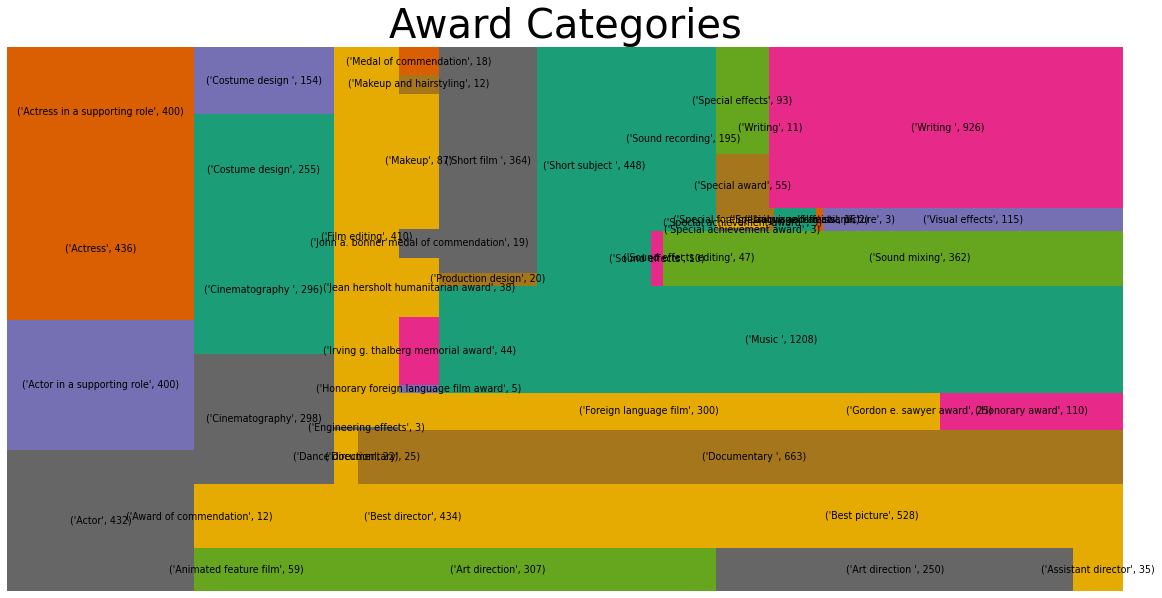

In [24]:
sizes = award_categories.counts.to_list()
np.random.seed(seed=12345)
color = plt.cm.Dark2(np.random.rand(len(sizes)))
label = list(zip(award_categories.Award_category1, award_categories.counts))

# Attempt to visualize 1st degree category with a treemap plot!!!
plt.figure(figsize=(20,10))
squarify.plot(sizes=sizes, 
              color=color, 
              label=label,
              text_kwargs={'fontsize':9.5},
              pad=False)


# labels
plt.title('Award Categories', fontsize= 40)
plt.axis('off')

### how many oscars are given every year

In [25]:
# how many oscars for each year
#based on winner each year

df_winners = df[(df['Winner'] == 1)]
years = df_winners['Year_ceremony'].value_counts()
oscars_plot = go.Scatter(
    x = years.index,
    y = years.values,    
    mode='markers',
    marker=dict(
        size=15,
        color = years.values, 
        colorscale='plasma',
        showscale=True
    )
)
plotly.offline.iplot({
    "data": [oscars_plot],
    "layout": go.Layout(title="Evolution of number of Oscars / per year "
                           ,width=1000,height=300,)
})

#### Until 1940, the number of awards given every year was under 25.
#### Highest number of awards recorded is obsverved in 1951 & 1952 ,with 33 oscars awarded each year.

## What are the most awarded Films of All Time
     (until 2015 in case of this dataset)

### Most awarded Films:
. Titanic with 11 Oscars . The Lord of the Rings with 9 Oscars . Ben-Hur & The Last Emperor with 8 Oscars. 

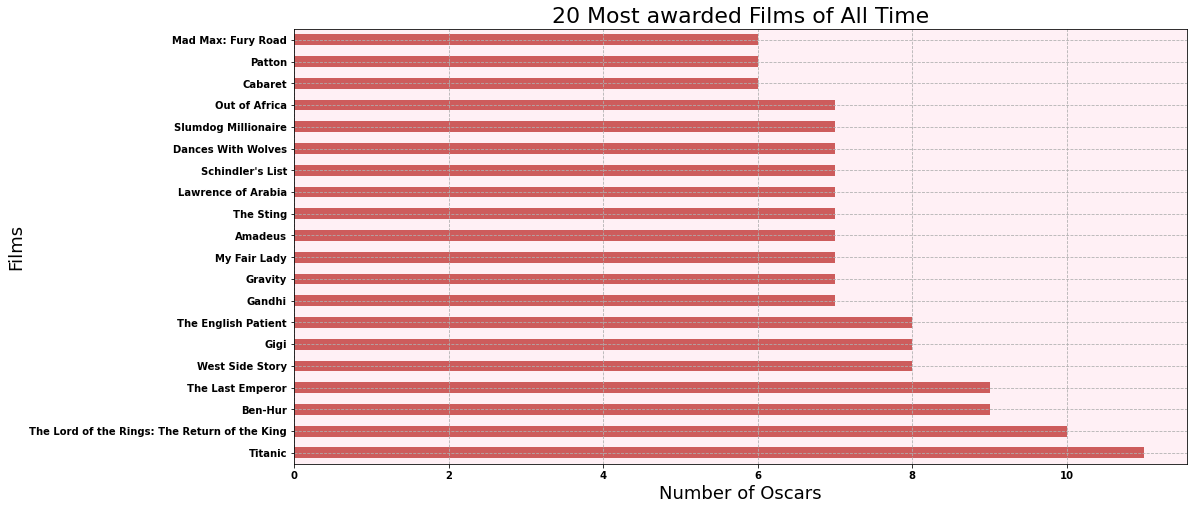

In [27]:
ax = plt.figure(figsize=(16,8))

ax = df[df.Winner==1].Name.value_counts()[:20].plot(kind='barh', color='indianred')
ax.grid(linestyle='--')
# Add title
plt.title("20 Most awarded Films of All Time", fontsize=22)
plt.xlabel("Number of Oscars", fontsize=18)
plt.ylabel("Films",fontsize=18 )
plt.rcParams["font.weight"] = "bold"
plt.rcParams['axes.facecolor']='lavenderblush'

### What award categories wins the most

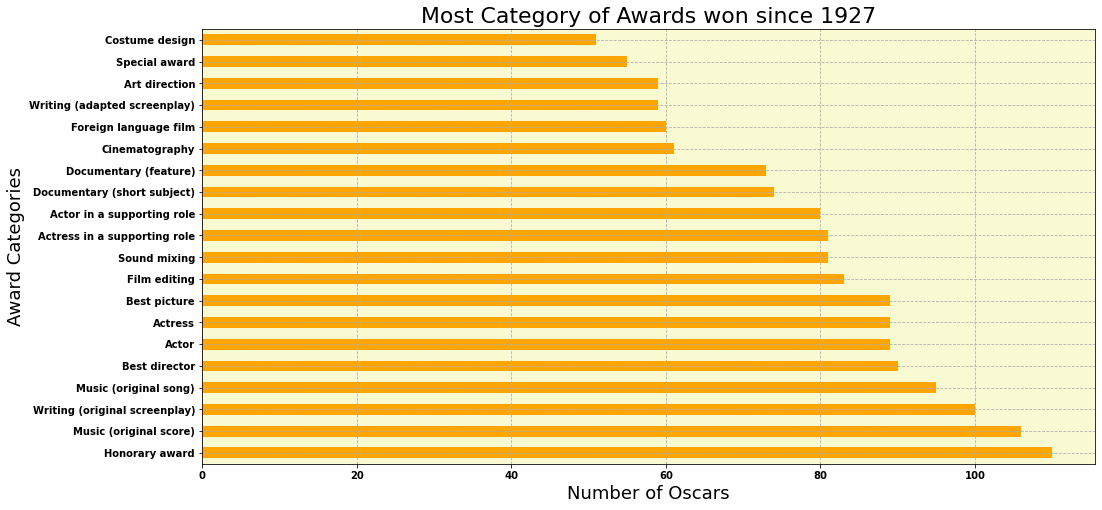

In [29]:
ax = plt.figure(figsize=(16,8))

ax = df[df.Winner==1].Award.value_counts()[:20].plot(kind='barh', color='#FFA500')
ax.grid(linestyle='--')
# Add title
plt.title("Most Category of Awards won since 1927", fontsize=22)
plt.xlabel("Number of Oscars", fontsize=18)
plt.ylabel("Award Categories", fontsize=18)
plt.rcParams["font.weight"] = "bold"
#plt.rcParams['axes.facecolor']='lightgoldenrodyellow'
#plt.ylabel(fontsize='bold')

#### Over a hundred people have received the Honorary Award since 1927, and is the number ONE most awarded category.

#### Original Music is the second most awarded category.

## Can you receive the Honorary more than Once

In [30]:
# Counting people who have received the Honory Award
Hon = df[(df['Award'] == 'Honorary award')]['Name'].value_counts()
HonorWin = df[(df['Award'] == 'Honorary award') & df['Winner'] == 1]['Name'].value_counts()

Honor_oscar = []

for i in HonorWin.index:
    if i in Hon.index:
        Honor_oscar.append(HonorWin[i])

axes_desc = go.Bar(
    x=HonorWin.index,
    y=Honor_oscar,
    name='Oscars'
)

data = [axes_desc]
plotly.offline.iplot({
    "data": data,
    "layout": go.Layout(barmode='group', title="Movie Industry People who have received the Honorary Award"
                           ,width=800,height=500)
})

#### So far, it looks like Bob Hope is the only person who have already received the Honorary Award Twice.

## Summary of people with most nominations and oscars for Music Composers and Directors Role.

### Who's frequently had the best substantial body of original music

In [31]:
Musik_orig = df[(df['Award'] == 'Music (original score)')]['Film'].value_counts()
Musik_orig = Musik_orig[(Musik_orig.values > 1)]
Musik_orig_Win = df[(df['Award'] == 'Music (original score)') & df['Winner'] == 1]['Film'].value_counts()
Musik_orig_Win = Musik_orig_Win[(Musik_orig_Win.values > 1)]

Musik_orig_nom = []
Musik_orig_oscar = []

for i in Musik_orig_Win.index:
    if i in Musik_orig.index:
        Musik_orig_oscar.append(Musik_orig_Win[i])
        Musik_orig_nom.append(Musik_orig[i])

        
Musik_trace1 = go.Bar(
    x=Musik_orig_Win.index,
    y=Musik_orig_nom,
    name='Nominations'
)
Musik_trace2 = go.Bar(
    x=Musik_orig_Win.index,
    y=Musik_orig_oscar,
    name='Oscars'
)

data = [Musik_trace1, Musik_trace2]
fig = plotly.offline.iplot({
    "data": data,
    "layout": go.Layout(barmode='group', title="Category: Music (Original Score) "
                           ,width=800,height=500)
})

#### => Most Awards : Alfred Newman with 7 Oscars.
#### => Most Nominations: Alfred Newman with 34 nominations.
#### A number of 14 music composers have at least been nominated once and won once.

### How many times a movie Director have been nominated vs how many times he actually won "Best Director"

In [32]:
director = df[(df['Award'] == 'Best director')]['Film'].value_counts()
director = director[(director.values > 1)]
directorWin = df[(df['Award'] == 'Best director') & df['Winner'] == 1]['Film'].value_counts()
directorWin = directorWin[(directorWin.values > 1)]

director_nom = []
director_oscar = []

for i in directorWin.index:
    if i in director.index:
        director_oscar.append(directorWin[i])
        director_nom.append(director[i])

        
trace1 = go.Bar(
    x=directorWin.index,
    y=director_nom,
    name='Nominations'
)
trace2 = go.Bar(
    x=directorWin.index,
    y=director_oscar,
    name='Oscars'
)

data = [trace1, trace2]
fig = plotly.offline.iplot({
    "data": data,
    "layout": go.Layout(barmode='group', title="Category: Best Director "
                           ,width=800,height=500)
})


#trace1.update_traces(marker_color='rgb(158,202,225)'),                  
#chart_studio.plotly(fig, color='transparent-background')

####  => Most Awards : John Ford with 4 Oscars.
####  => Most Nominations:  William Wyler with 12 nominations.
#### A number of 16 directors have at least been nominated once and won once.

In [30]:
# Let's make a new file of the cleaned data
#and attempt a prediction on Award Winnner ....

#df.to_csv("database_clean.csv", index=False)

## Oscar winner moel prediction using simple classifiers and CNN

In [ ]:
# Importing libraries to be used 

In [33]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
#from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.3.0


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [35]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

In [36]:
pred_df = pd.read_csv('database_clean.csv')

In [37]:
pred_df.shape

(9964, 9)

### Balancing the data set

In [38]:
balanced_df = pred_df.drop(['Award_category1', 'Year', 'Award_category2'], axis=1).copy()

In [39]:
balanced_df.head()

,Ceremony,Award,Winner,Name,Film,Year_ceremony
0,1,Actor,0,Richard Barthelmess,The Noose,1928
1,1,Actor,1,Emil Jannings,The Last Command,1928
2,1,Actress,0,Louise Dresser,A Ship Comes In,1928
3,1,Actress,1,Janet Gaynor,7th Heaven,1928
4,1,Actress,0,Gloria Swanson,Sadie Thompson,1928


In [40]:
loss = balanced_df[balanced_df['Winner'] == 0]
win = balanced_df[balanced_df['Winner'] == 1]

In [41]:
loss.shape, win.shape

((7643, 6), (2321, 6))

In [42]:
loss = loss.sample(win.shape[0])
loss.shape

(2321, 6)

In [43]:
balanced_df = win.append(loss, ignore_index=True)
balanced_df

,Ceremony,Award,Winner,Name,Film,Year_ceremony
0,1,Actor,1,Emil Jannings,The Last Command,1928
1,1,Actress,1,Janet Gaynor,7th Heaven,1928
2,1,Art direction,1,William Cameron Menzies,The Dove; Tempest,1928
3,1,Cinematography,1,Charles Rosher,Sunrise,1928
4,1,Cinematography,1,Karl Struss,Sunrise,1928
...,...,...,...,...,...,...
4637,88,Best picture,0,Room,"Ed Guiney, Producer",2015
4638,39,Actress in a supporting role,0,Geraldine Page,You're a Big Boy Now,1966
4639,14,Music (original score),0,Dr. Jekyll and Mr. Hyde,Franz Waxman,1941
4640,10,Actress,0,Janet Gaynor,A Star Is Born,1937


In [44]:
balanced_df['Winner'].value_counts()

1    2321
0    2321
Name: Winner, dtype: int64

## Labelling "Award" and "Name" variables

In [45]:
label_award = LabelEncoder()
balanced_df['label_award'] = label_award.fit_transform(balanced_df['Award'])
balanced_df.head()

,Ceremony,Award,Winner,Name,Film,Year_ceremony,label_award
0,1,Actor,1,Emil Jannings,The Last Command,1928,0
1,1,Actress,1,Janet Gaynor,7th Heaven,1928,2
2,1,Art direction,1,William Cameron Menzies,The Dove; Tempest,1928,5
3,1,Cinematography,1,Charles Rosher,Sunrise,1928,12
4,1,Cinematography,1,Karl Struss,Sunrise,1928,12


In [46]:
label_name = LabelEncoder()
balanced_df['label_name'] = label_name.fit_transform(balanced_df['Name'])
balanced_df.head()

,Ceremony,Award,Winner,Name,Film,Year_ceremony,label_award,label_name
0,1,Actor,1,Emil Jannings,The Last Command,1928,0,882
1,1,Actress,1,Janet Gaynor,7th Heaven,1928,2,1348
2,1,Art direction,1,William Cameron Menzies,The Dove; Tempest,1928,5,3099
3,1,Cinematography,1,Charles Rosher,Sunrise,1928,12,618
4,1,Cinematography,1,Karl Struss,Sunrise,1928,12,1459


In [47]:
balanced_df = balanced_df.drop(['Award','Name','Film'], axis=1)

In [48]:
balanced_df.head()

,Ceremony,Winner,Year_ceremony,label_award,label_name
0,1,1,1928,0,882
1,1,1,1928,2,1348
2,1,1,1928,5,3099
3,1,1,1928,12,618
4,1,1,1928,12,1459


In [49]:
X = balanced_df.drop('Winner', axis = 1)
y = balanced_df['Winner']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
X_train.shape, y_train.shape

((3713, 4), (3713,))

In [52]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

## Implement Classifier models

In [53]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [54]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 54.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 54.0 % accuracy score
Classifiers:  SVC Has a training score of 51.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 55.00000000000001 % accuracy score


#### => pretty low accuracy.


## Implement CNN model

In [55]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [56]:
X_train.shape[0], y_train.shape[0]

(3713, 3713)

In [57]:
X_train.shape, y_train.shape

((3713, 4, 1), (3713,))

In [58]:
epochs = 30
model = Sequential()
model.add(Conv1D(32,2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv1D(64,2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(1, activation='sigmoid'))

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 3, 32)             96        
_________________________________________________________________
batch_normalization (BatchNo (None, 3, 32)             128       
_________________________________________________________________
dropout (Dropout)            (None, 3, 32)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2, 64)             4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 2, 64)             256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [60]:
model.compile(optimizer= Adam(lr=0.0001), loss='binary_crossentropy', metrics='accuracy')

##### training set is used to train the model and validation set used to evaluate the performance of the model

In [61]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
117/117 [==============================] - 1s 5ms/step - loss: 1.0564 - accuracy: 0.4910 - val_loss: 0.7037 - val_accuracy: 0.5102
Epoch 2/30
117/117 [==============================] - 0s 3ms/step - loss: 0.9519 - accuracy: 0.5036 - val_loss: 0.6899 - val_accuracy: 0.5436
Epoch 3/30
117/117 [==============================] - 0s 3ms/step - loss: 0.8907 - accuracy: 0.5166 - val_loss: 0.6908 - val_accuracy: 0.5167
Epoch 4/30
117/117 [==============================] - 0s 3ms/step - loss: 0.8754 - accuracy: 0.4921 - val_loss: 0.6920 - val_accuracy: 0.5156
Epoch 5/30
117/117 [==============================] - 0s 3ms/step - loss: 0.8454 - accuracy: 0.4902 - val_loss: 0.6953 - val_accuracy: 0.4898
Epoch 6/30
117/117 [==============================] - 0s 3ms/step - loss: 0.8056 - accuracy: 0.5104 - val_loss: 0.6957 - val_accuracy: 0.4898
Epoch 7/30
117/117 [==============================] - 0s 3ms/step - loss: 0.7928 - accuracy: 0.4988 - val_loss: 0.6967 - val_accuracy: 0.4887
Epoch 

#### => accuracy low
##### training accuracy  <  validation accuracy ; overfitting

##### The classifiers performed slightly better than CNN

In [ ]:
# plotting the learning

In [63]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

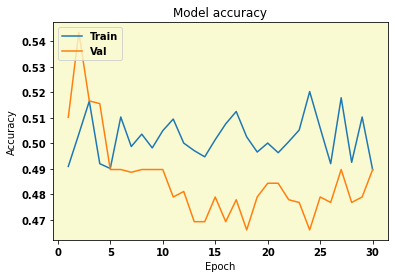

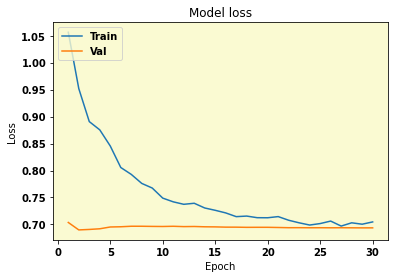

In [65]:
plot_learningCurve(history, epochs)